# Multi linear model

Single shot multi linear model

In [232]:
import time

import pandas as pd
import tensorflow as tf

from window import WindowGenerator
import utils

## Dataset

In [233]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [234]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]

In [235]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Model creation

In [236]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 30
features_size = len(label_columns)

print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [237]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

In [238]:
multi_dense_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [239]:
exec_times = {}

In [240]:
results = {}

## Case 2

In [241]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_2'] = time.time() - start_t

2022-10-11 11:21:54.405078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 11:21:54.922082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [242]:
multi_dense_model.build(input_shape=window.example[0].shape)
print(multi_dense_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_7 (Lambda)           (None, 1, 272)            0         
                                                                 
 dropout_28 (Dropout)        (None, 1, 272)            0         
                                                                 
 dense_21 (Dense)            (None, 1, 10)             2730      
                                                                 
 dropout_29 (Dropout)        (None, 1, 10)             0         
                                                                 
 dense_22 (Dense)            (None, 1, 10)             110       
                                                                 
 dropout_30 (Dropout)        (None, 1, 10)             0         
                                                                 
 dense_23 (Dense)            (None, 1, 2430)          

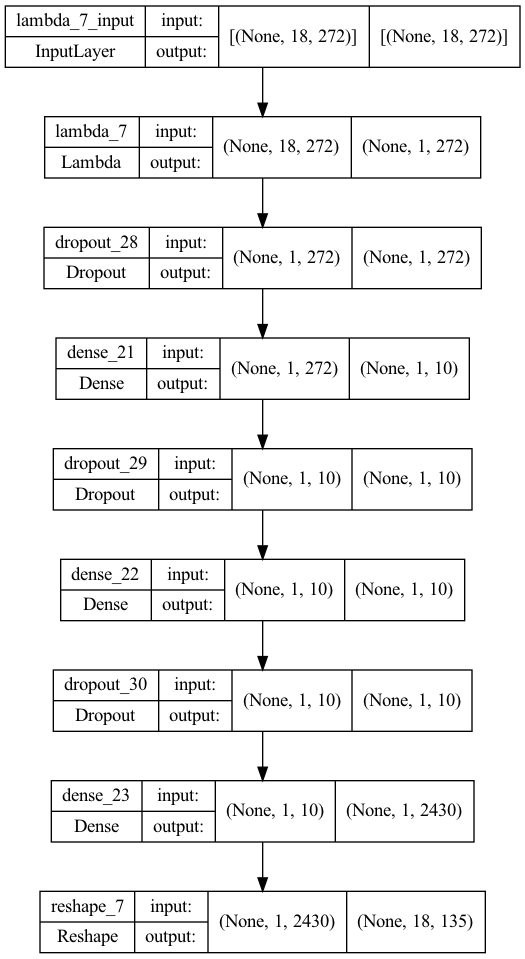

In [243]:
tf.keras.utils.plot_model(multi_dense_model, "../plots/models/multi_lineal.png", show_shapes=True)

label_col_index 134
label_col_index 134
label_col_index 134


2022-10-11 11:22:08.203360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


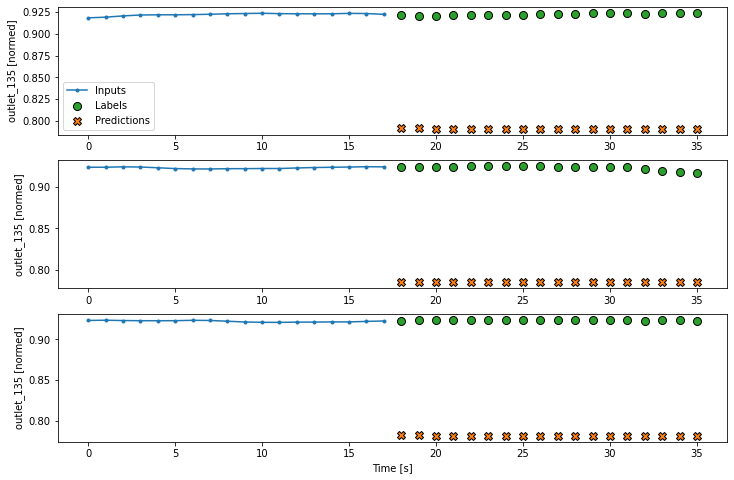

In [244]:
window.plot(multi_dense_model, plot_col="outlet_135")

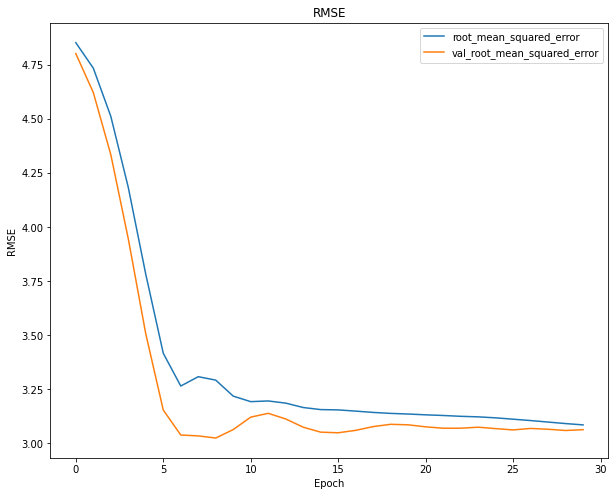

In [245]:
utils.plot_losses(history=history)

In [246]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [247]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_3'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


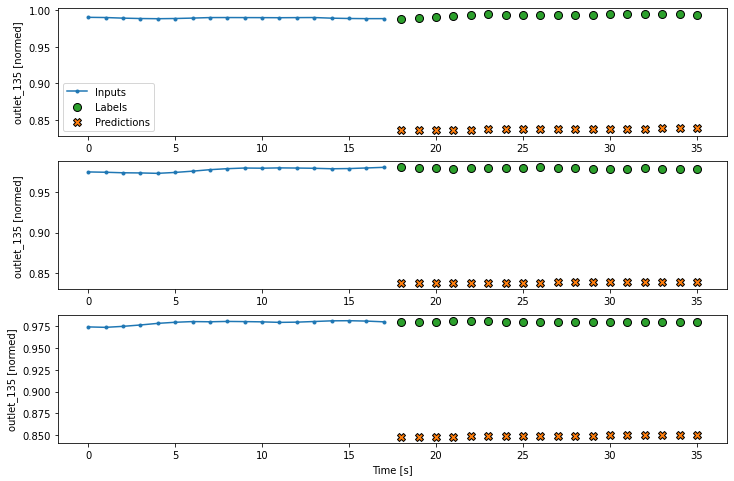

In [248]:
window.plot(multi_dense_model, plot_col="outlet_135")

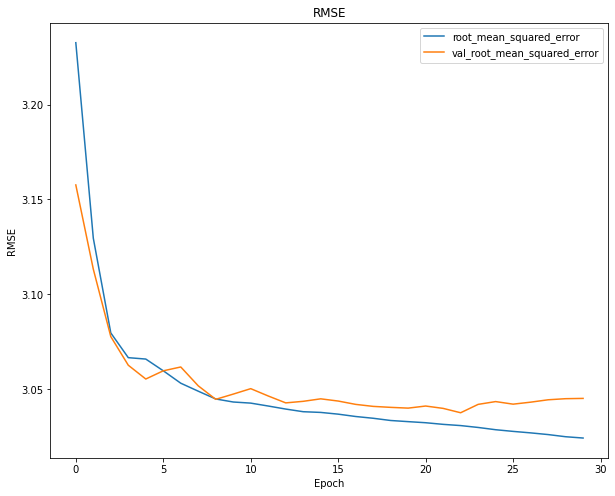

In [249]:
utils.plot_losses(history=history)

In [250]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [251]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)
exec_times['case_4'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


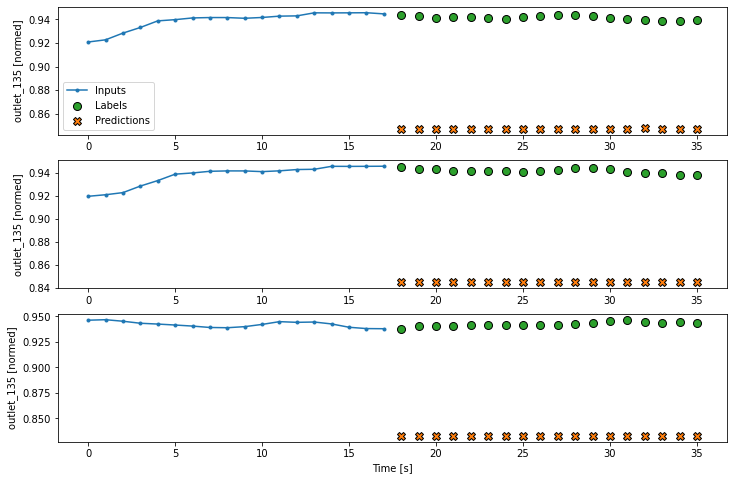

In [252]:
window.plot(multi_dense_model, plot_col="outlet_135")

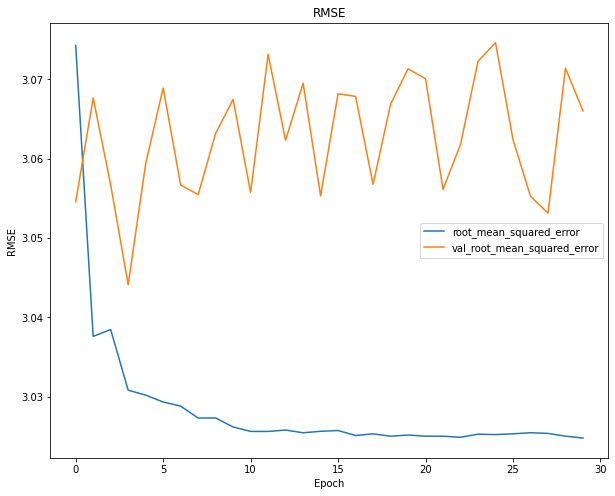

In [253]:
utils.plot_losses(history=history)

In [254]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [255]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


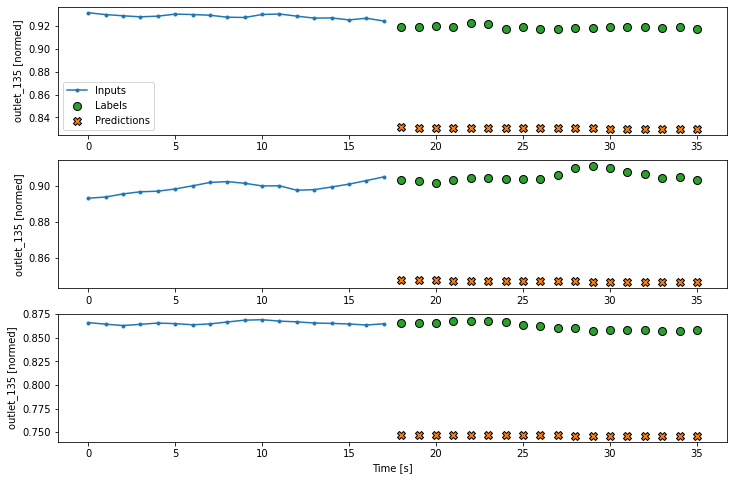

In [256]:
window.plot(multi_dense_model, plot_col="outlet_135")

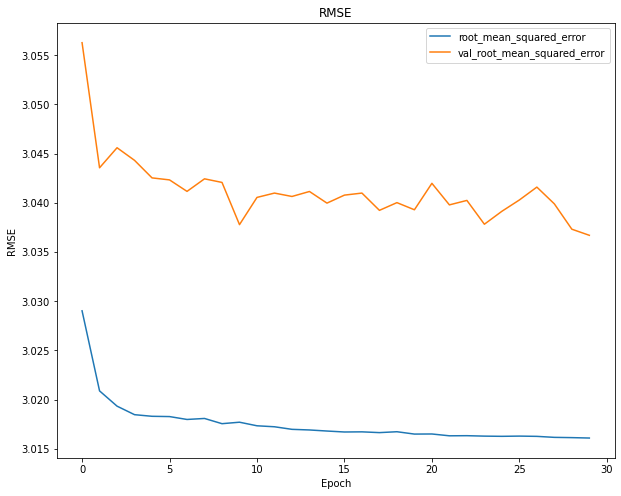

In [257]:
utils.plot_losses(history=history)

In [258]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [259]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_results = multi_dense_model.evaluate(window.train)

5/5 [==============================] - 0s 11ms/step - loss: 0.0245 - root_mean_squared_error: 0.1681


label_col_index 134
label_col_index 134
label_col_index 134


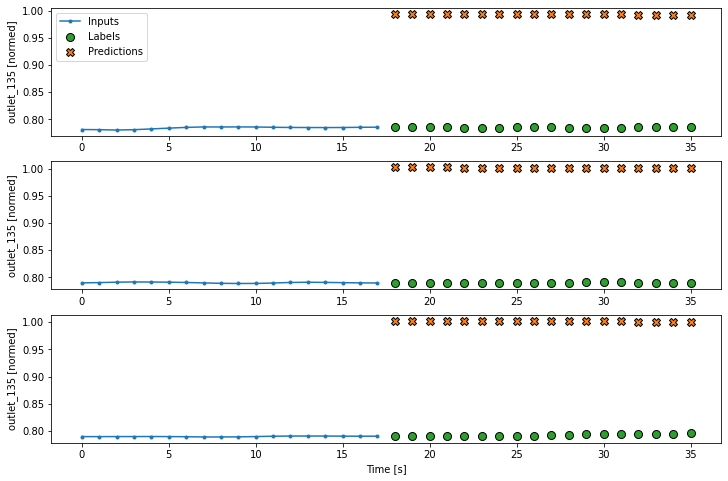

In [260]:
window.plot(multi_dense_model)

## Results

In [261]:
results['test'] = {
    'loss': utils.inverse_transform_loss(test_results[0]),
    'rmse': utils.inverse_transform_rmse(test_results[1])
}

In [262]:
pd.DataFrame(results).transpose().round(2)

,loss,rmse,val_loss,val_rmse
case_2,9.49,3.09,9.38,3.06
case_3,9.18,3.02,9.28,3.05
case_4,9.18,3.02,9.38,3.07
case_5,9.13,3.02,9.23,3.04
test,9.67,3.12,NaN,NaN


In [263]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,14.01
case_3,13.19
case_4,15.03
case_5,18.44


In [264]:
print("Total training time: %.2fs" % exec_times_df['Time'].sum())

Total training time: 60.67s
